# 分析Z500上各个模型的PSD

In [2]:
import sys
sys.path.append("../")
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from src.utils.plot import subplot_daloop
from src.utils.data_utils import NAME_TO_VAR
from pysteps.utils.spectral import rapsd, corrcoef
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

In [3]:
DALOOP_DIR = "../../results/da_loop"
ERA5_DIR = "../../data/era5"
BACKGRDOUND_DIR = "../../data/background"
VARIABLE = "geopotential"
LEVEL = 500
RESOLUTION = 5.625

In [4]:
gt = xr.open_mfdataset(f"{ERA5_DIR}/{VARIABLE}_{LEVEL}_{RESOLUTION}deg/test/*.nc", combine="by_coords")
xb = xr.open_mfdataset(f"{BACKGRDOUND_DIR}/{VARIABLE}_{LEVEL}_{RESOLUTION}deg/test/*.nc", combine="by_coords")

In [5]:
fc_4dvar_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/fc_iter_4dvar_obspartial0.2.nc", combine="by_coords")
fc_4dvarnet_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/fc_iter_4dvarnet_obspartial0.2.nc", combine="by_coords")
fc_vit_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/fc_iter_vit_obspartial0.2.nc", combine="by_coords")
fc_4dvarcyclegan_obs20 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.2/fc_iter_4dvarcyclegan_wscale_obspartial0.2.nc", combine="by_coords")

In [6]:
fc_4dvar_obs15 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.15/fc_iter_4dvar_obspartial0.15.nc", combine="by_coords")
fc_4dvarnet_obs15 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.15/fc_iter_4dvarnet_obspartial0.15.nc", combine="by_coords")
fc_vit_obs15 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.15/fc_iter_vit_obspartial0.15.nc", combine="by_coords")
fc_4dvarcyclegan_obs15 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.15/fc_iter_4dvarcyclegan_wscale_obspartial0.15.nc", combine="by_coords")

In [7]:
fc_4dvar_obs10 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.1/fc_iter_4dvar_obspartial0.1.nc", combine="by_coords")
fc_4dvarnet_obs10 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.1/fc_iter_4dvarnet_obspartial0.1.nc", combine="by_coords")
fc_vit_obs10 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.1/fc_iter_vit_obspartial0.1.nc", combine="by_coords")
fc_4dvarcyclegan_obs10 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.1/fc_iter_4dvarcyclegan_wscale_obspartial0.1.nc", combine="by_coords")

In [8]:
fc_4dvar_obs5 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.05/fc_iter_4dvar_obspartial0.05.nc", combine="by_coords")
fc_4dvarnet_obs5 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.05/fc_iter_4dvarnet_obspartial0.05.nc", combine="by_coords")
fc_vit_obs5 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.05/fc_iter_vit_obspartial0.05.nc", combine="by_coords")
fc_4dvarcyclegan_obs5 = xr.open_mfdataset(f"{DALOOP_DIR}/obs_partial_0.05/fc_iter_4dvarcyclegan_wscale_obspartial0.05.nc", combine="by_coords")

## 绘制同化预报循环误差

In [9]:
fc_iter_stat = {
    "ERA5": gt[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].sel(time=fc_4dvar_obs20.time),
    "Background": xb[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]].sel(time=fc_4dvar_obs20.time).sel(init_time=-72).sel(level=500),
}

In [10]:
fc_iter_obs20 = {
    "4DVar Obs20": fc_4dvar_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "4DVarNet Obs20": fc_4dvarnet_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "ViT Obs20": fc_vit_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "4DVarGAN Obs20": fc_4dvarcyclegan_obs20[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
}

In [11]:
fc_iter_obs15 = {
    "4DVar Obs15": fc_4dvar_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "4DVarNet Obs15": fc_4dvarnet_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "ViT Obs15": fc_vit_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "4DVarGAN Obs15": fc_4dvarcyclegan_obs15[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
}

In [12]:
fc_iter_obs10 = {
    "4DVar Obs10": fc_4dvar_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "4DVarNet Obs10": fc_4dvarnet_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "ViT Obs10": fc_vit_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "4DVarGAN Obs10": fc_4dvarcyclegan_obs10[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
}

In [13]:
fc_iter_obs5 = {
    "4DVar Obs5": fc_4dvar_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "4DVarNet Obs5": fc_4dvarnet_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "ViT Obs5": fc_vit_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
    "4DVarGAN Obs5": fc_4dvarcyclegan_obs5[NAME_TO_VAR[f"{VARIABLE}_{LEVEL}"]],
}

In [14]:
def compute_mean_spectral_density(data: xr.DataArray, timestamp=None, num_times=None):
    # data = data.sel(time=slice(self.time_period[0], self.time_period[1]))
    # data = data.isel(lon=slice(0 + 10, 59 + 10), lat=slice(0 + 10, 59 + 10))
    num_frequencies = np.max((len(data.lat.values), len(data.lon.values))) / 2

    mean_spectral_density = np.zeros(int(num_frequencies))

    if num_times is None:
        num_times = int(len(data.time))
    elif timestamp is not None:
        num_times = 1

    else:
        num_times = num_times

    for t in range(num_times):
        if timestamp is not None:
            tmp = data.sel(time=timestamp).values
        else:
            tmp = data.isel(time=t).values
        psd, freq = rapsd(tmp, return_freq=True, normalize=True, fft_method=np.fft)
        mean_spectral_density += psd
    mean_spectral_density /= num_times

    return mean_spectral_density, freq

In [15]:
psd_stat = {}
for method in ["ERA5", "Background"]:
    psd, freq = compute_mean_spectral_density(fc_iter_stat[method])
    psd_stat[method]= psd

In [43]:
psd_obs20 = {}
for method in ["4DVar Obs20", "4DVarNet Obs20", "ViT Obs20", "4DVarGAN Obs20"]:
    psd, freq = compute_mean_spectral_density(fc_iter_obs20[method].sel(lead_time=0))
    psd_obs20[method]= psd

In [44]:
psd_obs15 = {}
for method in ["4DVar Obs15", "4DVarNet Obs15", "ViT Obs15", "4DVarGAN Obs15"]:
    psd, freq = compute_mean_spectral_density(fc_iter_obs15[method].sel(lead_time=0))
    psd_obs15[method]= psd

In [45]:
psd_obs10 = {}
for method in ["4DVar Obs10", "4DVarNet Obs10", "ViT Obs10", "4DVarGAN Obs10"]:
    psd, freq = compute_mean_spectral_density(fc_iter_obs10[method].sel(lead_time=0))
    psd_obs10[method]= psd

In [46]:
psd_obs5 = {}
for method in ["4DVar Obs5", "4DVarNet Obs5", "ViT Obs5", "4DVarGAN Obs5"]:
    psd, freq = compute_mean_spectral_density(fc_iter_obs5[method].sel(lead_time=0))
    psd_obs5[method]= psd

In [47]:
def subplot_psd(psd_stat, psds, freq, axis=None, fname=None, fontsize=None, linewidth=None):

    fig = plt.figure(figsize=(12, 12))

    plt.rcParams.update({'font.size': 12})
    x_vals = 1 / freq * 5.625 * 111 / 2
    x_ticks = [2 ** 9, 2 ** 10, 2 ** 11, 2 ** 12, 2 ** 13]
    for i in range(4):
        ax = fig.add_subplot(2, 2, i+1)
        ax.plot(x_vals, psd_stat["ERA5"], label=f'ERA5', linewidth=linewidth, color='k')
        ax.plot(x_vals, psd_stat["Background"], label=f'Background', linewidth=linewidth, color="purple")
        for method in psds[i].keys():
            ax.plot(x_vals, psds[i][method], label=method.split(" ")[0], linewidth=linewidth)
        ax.legend(loc='lower left', fontsize=fontsize)
        ax.set_xlim(x_vals[1] + 1024, x_vals[-1] - 32)
        ax.set_yscale('log', base=10)
        ax.set_xscale('log', base=2)
        ax.set_xticks(x_ticks)
        ax.tick_params(axis='x', labelsize=fontsize)
        ax.tick_params(axis='y', labelsize=fontsize)
        ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
        ax.grid()
        # ax.set_ylim(4.5e-5, 0.07)
        ax.set_xlabel(r'WaveLength [km]', fontsize=fontsize)
        ax.set_ylabel('PSD [a.u]', fontsize=fontsize)
        plt.title(f'{method.split(" ")[-1]}% Observations')

        # axins = inset_axes(ax, width="40%", height="50%", loc='upper right', bbox_to_anchor=(0.3, 0.1, 0.7, 0.9),
        #                    bbox_transform=ax.transAxes)
        # for j in range(len(psds)):
        #     axins.plot(x_vals, psds[j] if names[j]=='ERA5' else psds[j][i], label=f'{names[j]}', linewidth=linewidth)

        # sx = [1406, 384*2, 384*2, 1406, 1406]
        # sy = [10e-11, 10e-11, 5*10e-9, 5*10e-9, 10e-11]
        # ax.plot(sx, sy, 'black', linewidth=1)

        # xy, xy2 = (1406, 5*10e-9), (1406, 5*10e-9)
        # con = ConnectionPatch(xyA=xy2, xyB=xy, coordsA='data', coordsB='data', axesA=axins, axesB=ax)
        # axins.add_artist(con)

        # xy, xy2 = (384*2, 10e-11), (384*2, 10e-11)
        # con = ConnectionPatch(xyA=xy2, xyB=xy, coordsA='data', coordsB='data', axesA=axins, axesB=ax)
        # axins.add_artist(con)

        # axins.set_ylim(10e-11, 5*10e-9)
        # axins.set_xlim(1406, 384*2)
        # axins.set_yscale('log', base=10)
        # axins.set_xscale('log', base=2)
        # axins.get_xaxis().set_visible(False)
        # axins.get_yaxis().set_visible(False)

    # if fname is not None:
    #     plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

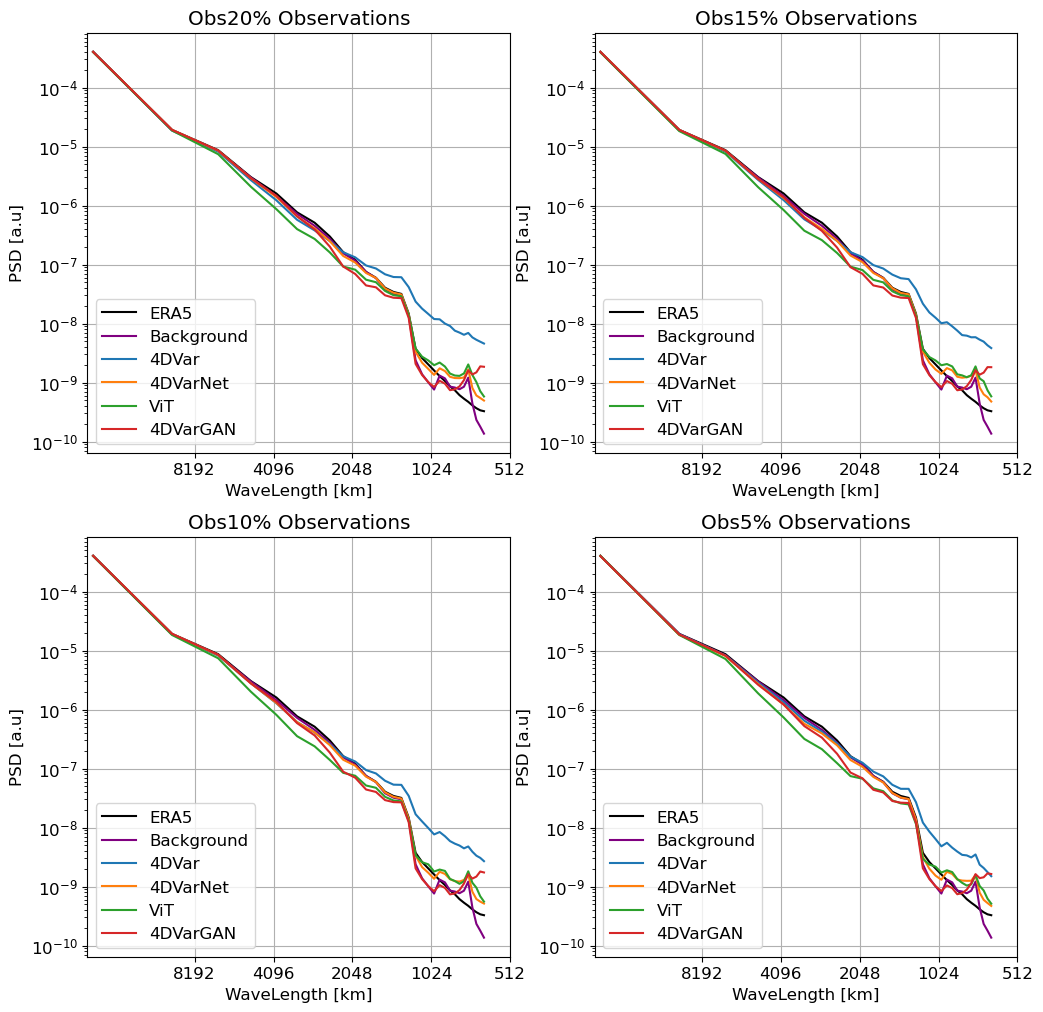

In [48]:
subplot_psd(psd_stat, [psd_obs20, psd_obs15, psd_obs10, psd_obs5], freq, fontsize=12, linewidth=1.5, fname='PSD_subplot_inittime.pdf')